In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df= pd.read_csv('./data/telecom_churn.csv')

In [3]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


###### Basic Pre Processing

In [4]:
df['Churn'] = df['Churn'].astype('int')
df['International plan'] = df['International plan'].map({'Yes': 1, 'No': 0})
df['Voice mail plan'] = df['Voice mail plan'].map({'Yes': 1, 'No': 0})

In [5]:
df.shape

(3333, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
State                     3333 non-null object
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null int64
Voice mail plan           3333 non-null int64
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64
Ch

In [7]:
# Drop the states as it not supported by sk learn decision trees
states = df.pop('State')

##### Seperate the features and the independent varaibles

In [8]:
X , y = df.drop(['Churn'],axis =1), df['Churn']

In [9]:
X.shape, y.shape

((3333, 18), (3333,))

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_holdout,y_train,y_holdout = train_test_split(X,y,test_size=0.3,random_state=17)

In [12]:
X_train.shape, X_holdout.shape

((2333, 18), (1000, 18))

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
tree = DecisionTreeClassifier(random_state=17)

In [16]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=17, splitter='best')

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
pred_holdout= tree.predict(X_holdout)

In [19]:
pred_holdout.shape , y_holdout.shape

((1000,), (1000,))

In [20]:
accuracy_score(y_holdout,pred_holdout) 

0.92100000000000004

###### Check the Baseline accuracy 

In [21]:
import numpy as np

In [22]:
y_train.value_counts(normalize=True)

0    0.849979
1    0.150021
Name: Churn, dtype: float64

### Cross Validation

In [34]:
from sklearn.model_selection import cross_val_score,StratifiedKFold

In [40]:
tree = DecisionTreeClassifier(random_state=17)
val_scores = cross_val_score(estimator=tree, X=X_train, y=y_train,cv=skf)
tree.fit(X_train,y_train)
holdout_prediction = tree.predict(X_holdout)
cv_accuracy = accuracy_score (y_holdout,holdout_prediction)

In [41]:
print(val_scores)
print(val_scores.mean())
print(cv_accuracy)

[ 0.91220557  0.91648822  0.90792291  0.92703863  0.91201717]
0.915134499269
0.921


### Cross Validation testing for different depth values

In [23]:
from sklearn.model_selection import cross_val_score,StratifiedKFold

In [24]:
from tqdm import tqdm_notebook as tqm

In [25]:
skf = StratifiedKFold(n_splits =5,shuffle=True,random_state=17)

In [26]:
cv_accuracy_depth ,ho_accuracy_depth = [], []
max_depth_values = np.arange(2,11)

for curr_max_depth in tqm(max_depth_values):
    tree = DecisionTreeClassifier(random_state=17, max_depth=curr_max_depth)
    # perform Cross Validation
    val_scores = cross_val_score(estimator=tree, X=X_train, y=y_train,cv=skf)
    cv_accuracy_depth.append(val_scores.mean())
    # access the model with holdout    
    tree.fit(X_train,y_train)
    current_holdout_prediction = tree.predict(X_holdout) 
    ho_accuracy_depth.append(accuracy_score(y_holdout, current_holdout_prediction))

In [27]:
print("cv_accuracy_depth",cv_accuracy_depth)
print("ho_accuracy_depth",ho_accuracy_depth)

cv_accuracy_depth [0.88084017240903945, 0.90141621711040243, 0.91770868754078161, 0.93228533879846709, 0.94085800148882015, 0.9391431013408571, 0.93828473224214459, 0.93185247815018712, 0.93399564382277533]
ho_accuracy_depth [0.88100000000000001, 0.90500000000000003, 0.91900000000000004, 0.93999999999999995, 0.94499999999999995, 0.94599999999999995, 0.94399999999999995, 0.94499999999999995, 0.94499999999999995]


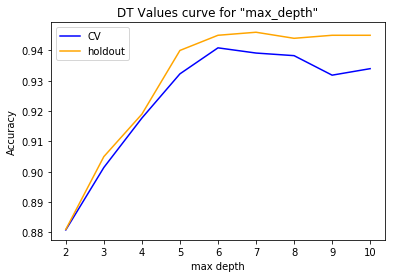

In [28]:
plt.plot(max_depth_values,cv_accuracy_depth,label='CV',c='blue')
plt.plot(max_depth_values,ho_accuracy_depth,label = 'holdout' , c= 'orange')
plt.legend()
plt.xlabel('max depth')
plt.ylabel('Accuracy')
plt.title('DT Values curve for "max_depth"')

### Perform Grid Search

In [42]:
from sklearn.model_selection import GridSearchCV , StratifiedKFold

In [43]:
sfk = StratifiedKFold(n_splits =5,shuffle=True,random_state=17)

In [44]:
params = {'max_depth':np.arange(2,11),'min_samples_leaf':np.arange(2,11)}

In [45]:
best_tree = GridSearchCV(estimator=tree,param_grid=params ,n_jobs=-1,cv = sfk, 
                         verbose=1)

In [46]:
best_tree.fit(X_train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   39.6s
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:   40.9s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=17, splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]), 'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [47]:
best_tree.best_params_

{'max_depth': 6, 'min_samples_leaf': 4}

In [48]:
best_tree.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=4,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=17, splitter='best')

In [49]:
best_tree.fit(X_holdout,y_holdout)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   42.0s
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:   42.8s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=17, splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]), 'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

** Cross Validation Assessment **

In [50]:
best_tree.best_score_

0.92400000000000004

##### Holdout Assesment

In [51]:
pred_holdout_better = best_tree.predict(X_holdout)

In [52]:
accuracy_score(y_holdout,pred_holdout_better) 

0.97499999999999998

In [55]:
from sklearn.tree import export_graphviz

In [ ]:
# first class
np.random.seed(17)
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)

# adding second class
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
cmap='autumn', edgecolors='black', linewidth=1.5);
plt.plot(range(-2,5), range(4,-3,-1));

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Let’s write an auxiliary function that will return grid for further visualization.
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, 
                                  random_state=17)

# training the tree
clf_tree.fit(train_data, train_labels)

# some code to depict separating surface
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), 
                                   yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='autumn', edgecolors='black', linewidth=1.5);

In [ ]:
data = pd.DataFrame({'Age': [17,64,18,20,38,49,55,25,29,31,33], 
             'Loan Default': [1,0,1,0,1,0,0,1,1,0,1]})
data

In [ ]:
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, 
                                  random_state=17)

train_data=pd.DataFrame(data['Age'])

train_labels=pd.DataFrame(data['Loan Default'])
# training the tree
clf_tree.fit(train_data, train_labels)



In [ ]:
# some code to depict separating surface
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), 
                                   yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='autumn', edgecolors='black', linewidth=1.5);

In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
features = ['Looks', 'Alcoholic_beverage','Eloquence','Money_spent']


In [ ]:
df_train = {}
df_train['Looks'] = ['handsome', 'handsome', 'handsome', 'repulsive',
                         'repulsive', 'repulsive', 'handsome'] 
df_train['Alcoholic_beverage'] = ['yes', 'yes', 'no', 'no', 'yes', 'yes', 'yes']
df_train['Eloquence'] = ['high', 'low', 'average', 'average', 'low',
                                   'high', 'average']
df_train['Money_spent'] = ['lots', 'little', 'lots', 'little', 'lots',
                                  'lots', 'lots']
df_train['Will_go'] = LabelEncoder().fit_transform(['+', '-', '+', '-', '-', '+', '+'])



In [ ]:
out = pd.DataFrame(df_train)
pd.get_dummies(out[features])